# T-tests
### The t-distribution
The script below allow us to plot the t-distribution for a given degrees of freedom.

Text(0, 0.5, 'PDF')

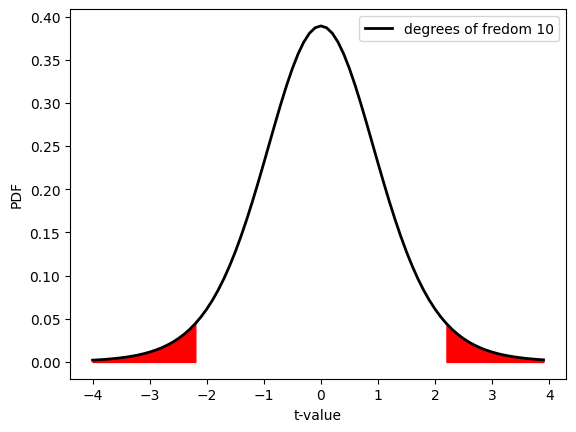

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x=np.arange(-4,4,0.1)
df=10
t=stats.t.pdf(x,df=df)

t_left=[]
x_left=[]
for xx,tt in zip(x,t):
  if tt < 0.05 and xx < 0:
    t_left.append(tt)
    x_left.append(xx)

t_right=[]
x_right=[]
for xx,tt in zip(x,t):
  if tt < 0.05 and xx > 0:
    t_right.append(tt)
    x_right.append(xx)


plt.plot(x,t,label=f'degrees of fredom {df}',linewidth=2,color="black")
plt.fill_between(x_left,0,t_left,color="red")
plt.fill_between(x_right,0,t_right,color='red')
plt.legend()
plt.xlabel("t-value")
plt.ylabel("PDF")

## One-sample t-test
In this example we test the claim of our sample data having a mean of 0.5.

In [8]:
import numpy as np
from scipy import stats

data=[0.52508266, 0.09735529, 0.18190318, 0.55766562, 0.37788684, 0.44707692]


t_test, p_value =stats.ttest_1samp(data , popmean=0.5 , alternative='less')

print("t-test: ",t_test," -> P-value: ",p_value)



t-test:  -1.775161048201416  -> P-value:  0.06802008896186788


Since we the variable that generates our data is a uniform random number in the intervall 0-1 we know that the mean should be 0.5. We can therefore expect to reject the null hypothesis in about 5 % of the cases.


Can you make a simple program to demonstrate that this is indeed the case?

In [9]:
import numpy as np
from scipy import stats

data_1 = np.random.rand(10)
t_test,p_value =stats.ttest_1samp(data_1,popmean=0.5,alternative='less')

# Set significance level (α)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.         t-test: ",t_test, "--> p-value: ", p_value," < ", alpha)
else:
    print("Fail to reject the null hypothesis. t-test: ",t_test, "--> p-value: ",p_value," > ", alpha)


Fail to reject the null hypothesis. t-test:  -0.8258718988336871 --> p-value:  0.21511233668280072  >  0.05


## Two-sample t-tests
### Two-samlpe t-test (independent)
In this example we compare if two data-sets have significantly different mean values.

In [10]:
import numpy as np
from scipy import stats

N1=5
N2=4
offset=0.25

data_1 = np.random.rand(N1)+offset
data_2 = np.random.rand(N2)

print("Mean value data_1: ",np.array(data_1).mean())
print("Mean value data_2: ",np.array(data_2).mean())
print("")
print("============================================================================================================")

# Perform the two independent samples t-test
t_test, p_value = stats.ttest_ind(data_1, data_2)

# Set significance level (α)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("t-test:", t_test, "--> p-value: ",p_value," < ",alpha)
    print("Reject the null hypothesis. The distributions are significantly different.")
else:
    print("t-test:", t_test, "--> p-value: ",p_value," > ",alpha)
    print("Fail to reject the null hypothesis.")



Mean value data_1:  0.8099905949319677
Mean value data_2:  0.6565786129164769

t-test: 0.7096184646717383 --> p-value:  0.5008878570670491  >  0.05
Fail to reject the null hypothesis.


### Two-sample t-test (relative)

In this example we compare repeated measurements.

In [11]:
import numpy as np
from scipy import stats

N1=5
N2=N1
offset=0.25

data_1 = np.random.rand(N1)+offset
data_2 = np.random.rand(N2)

print("Mean value data_1: ",np.array(data_1).mean())
print("Mean value data_2: ",np.array(data_2).mean())
print("")
print("============================================================================================================")

# Perform relative two-samples t-test
t_test, p_value = stats.ttest_rel(data_1, data_2)

# Set significance level (α)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("t-test:", t_test, "--> p-value: ",p_value," < ",alpha)
    print("Reject the null hypothesis. The distributions are significantly different.")
else:
    print("t-test:", t_test, "--> p-value: ",p_value," > ",alpha)
    print("Fail to reject the null hypothesis.")



Mean value data_1:  0.634680260668252
Mean value data_2:  0.37381183335037066

t-test: 1.0961877456431979 --> p-value:  0.3345633453873357  >  0.05
Fail to reject the null hypothesis.


### Exploring shifting and scaling...

Here you can try out what happens if the data is scaled or shifted.

Can you prove by means of pen and paper why the shifted data always leads to a P-value of 0?



In [13]:
import numpy as np
from scipy import stats

N=10

data_1=np.random.rand(N)
#data_2=[2*x for x in data_1]
data_2=[x+0.6 for x in data_1]
t_test, p_value = stats.ttest_rel(data_1, data_2)

print("t-test: ",t_test," -> P-value: ",p_value)


t-test:  -2.5634938485557444e+16  -> P-value:  1.0650753036490299e-144


# ANOVA

Explore the ANOVA tests and generalize to N-dimensions. Implement a function to make a pair-wise t-test with an option to perform Bonferroni correction.

In [14]:
N1=5 ; off1 = 0.1 ; w1=0.4
N2=4 ; off2 = 0.6 ; w2=0.3
N3=6 ; off3 = 0.3 ; w3=0.2

data_1 = w1*np.random.rand(N1)+off1
data_2 = w2*np.random.rand(N2)+off2
data_3 = w3*np.random.rand(N3)+off3

F_test, p_value =stats.f_oneway(data_1,data_2,data_3)

print("t-test: ",F_test," -> P-value: ",p_value)


t-test:  69.4266554435245  -> P-value:  2.5337187070481464e-07


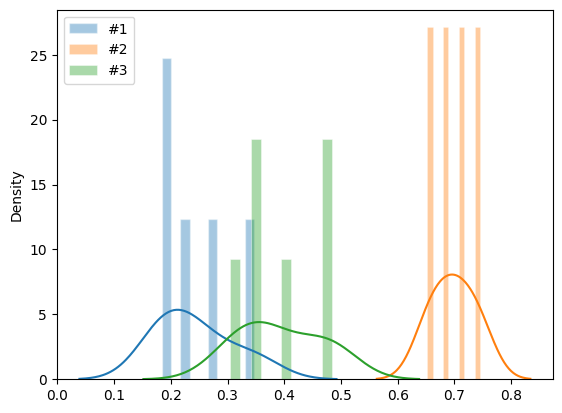

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_1, bins=10, label='#1',stat="density", kde=True,kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(data_2, bins=10, label='#2',stat="density", kde=True,kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(data_3, bins=10, label='#3',stat="density", kde=True,kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))

plt.legend()
plt.show()

### Perfrom pair-wise t-test

In [15]:
print("Pair 1-2")
t_test, p_value = stats.ttest_ind(data_1, data_2)
print(t_test,p_value)

print("Pair 1-3")
t_test, p_value = stats.ttest_ind(data_1, data_3)
print(t_test,p_value)

print("Pair 2-3")
t_test, p_value = stats.ttest_ind(data_2, data_3)
print(t_test,p_value)

Pair 1-2
-10.136867821301209 1.9558960383639142e-05
Pair 1-3
-2.595746316315469 0.02893942430753212
Pair 2-3
11.670208908620989 2.650360442844363e-06


### Perform Tukey's test

group1,group2,meandiff,p-adj,lower,upper,reject
#1,#2,0.5715,0.0,0.437,0.706,True
#1,#3,0.1264,0.0412,0.005,0.2478,True
#2,#3,-0.4451,0.0,-0.5745,-0.3156,True


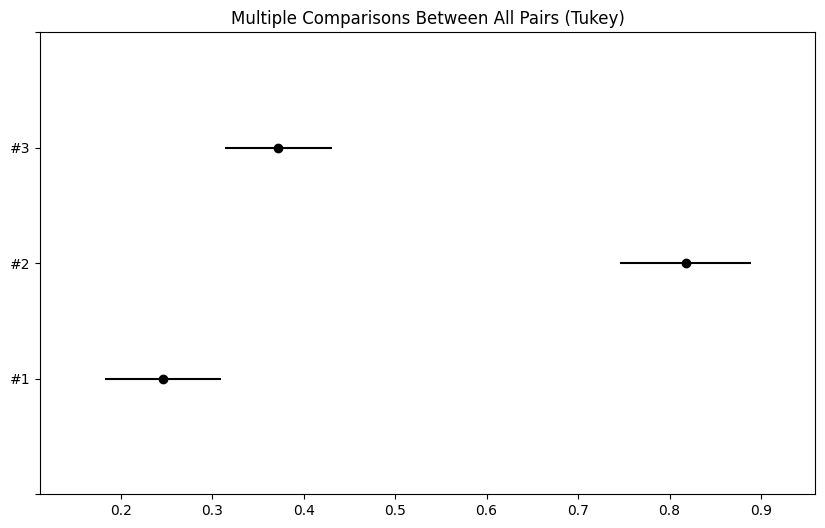

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

data_1=pd.DataFrame({"data-set": len(data_1)*["#1"], "data":data_1 })
data_2=pd.DataFrame({"data-set": len(data_2)*["#2"],  "data":data_2 })
data_3=pd.DataFrame({"data-set": len(data_3)*["#3"], "data":data_3 })

data=pd.concat([data_1,data_2,data_3],ignore_index=True)
tukey = pairwise_tukeyhsd(endog=data['data'],     # Data
                          groups=data['data-set'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()              # See test summary

# Final task!

1. Generate a population of 30 dogs of an imaginary bread. The following rows of data should be present and stored in a pandas data-frame:
  "Bread": str,     name of you bread
  "Age"  : integer, age of the dog when it died (I know it is a bit sad...)
  "Fur"  : float [0,1] ,  lenght of fur 0=very short, 1=very long
  "Color" : float [0,1] , 0=light color, 1=dark color

2. Test a claim on you generated data. Can we claim that dogs of our bread become older than 8 years?

3. Save your data as an csv-file and share with at-least two peers to make a larger pool of data.

4. Make statistical ANOVA and pair-wise t-tests of your "pooled" data and comment amd reflect on your results. E.g. test a claim if bread A is darker than bread B.

In [54]:
from numpy import random

#Generate the indivisuals
dogs = []
for i in range (0,30):
    dogs.append('Norwegian forest cat')

dogs_df = pd.DataFrame(dogs, columns=['Breed'])

#Generate the life span of the dogs 
Age = []
for i in range (0,30):
    Age.append(abs(round(np.random.logistic(loc=6, scale = 3))))

dogs_df['Age'] = pd.DataFrame(Age, columns=['Age'])

#Generate their fur length between 0 and 1
fur = []
for i in range (0,30):
    fur.append(np.random.random())

dogs_df['Fur'] = pd.DataFrame(fur, columns=['Fur'])

#Generate their color between 0 and 1
color = []
for i in range (0,30):
    color.append(np.random.random())

dogs_df['Color'] = pd.DataFrame(color, columns=['Color'])


In [ ]:
#T-test on Norwegian forest cats



In [ ]:
#read all the data for the different cats and dogs

